# MNIST Data

In [1]:
from model import Model
import numpy as np
from sklearn.datasets import load_iris
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import common
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255
y_train = common.one_hot_encode(y_train)
x_test = x_test.reshape(x_test.shape[0], -1) / 255
y_test = common.one_hot_encode(y_test)

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

In [5]:
mlp = Model()
mlp.add_layer(784, 200, act_fn='sigmoid')
mlp.add_layer(200, 128, act_fn='sigmoid')
mlp.add_layer(128, 64, act_fn='sigmoid')
mlp.add_layer(64, 10, act_fn='softmax')
losses, accs = mlp.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=20, batch_size=256, loss='crossentropy', learning_rate=0.001)

epoch  0 loss =  0.659682557448535 acc =  0.8983333333333333
epoch  1 loss =  0.3830466788358245 acc =  0.9265
epoch  2 loss =  0.2938063977394489 acc =  0.943
epoch  3 loss =  0.24304815309119476 acc =  0.9508333333333333
epoch  4 loss =  0.20985897747996454 acc =  0.9568333333333333
epoch  5 loss =  0.18611418583282177 acc =  0.962
epoch  6 loss =  0.16839614719865414 acc =  0.965
epoch  7 loss =  0.15510885358924761 acc =  0.9666666666666667
epoch  8 loss =  0.14511155324597116 acc =  0.9686666666666667
epoch  9 loss =  0.13741117305599906 acc =  0.9711666666666666
epoch  10 loss =  0.13151291171349536 acc =  0.9718333333333333
epoch  11 loss =  0.1270380437905436 acc =  0.974
epoch  12 loss =  0.12323262914904613 acc =  0.9736666666666667
epoch  13 loss =  0.12028271525095535 acc =  0.9741666666666666
epoch  14 loss =  0.11845893534839759 acc =  0.9745
epoch  15 loss =  0.11733862210057845 acc =  0.975
epoch  16 loss =  0.11685782888082222 acc =  0.9745
epoch  17 loss =  0.11680142

In [6]:
pred = mlp.predict(x_test)
pred = common.convert_to_binary(pred)
test = common.convert_to_binary(y_test)

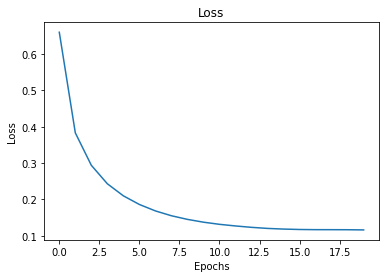

In [7]:
epoc = [i for i in range(20)]
plt.plot(epoc,losses)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

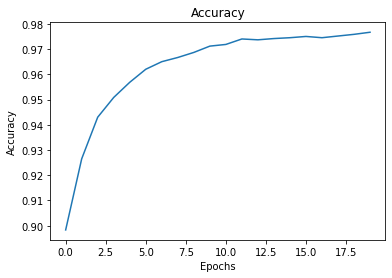

In [8]:
epoc = [i for i in range(20)]
plt.plot(epoc,accs)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

[[ 968    0    2    0    1    4    0    2    2    1]
 [   0 1125    1    3    0    1    2    1    2    0]
 [   4    1 1006    4    2    0    3    8    4    0]
 [   0    0    2  999    0    2    0    3    2    2]
 [   2    0    4    1  961    1    3    4    0    6]
 [   2    0    0    9    2  873    1    1    3    1]
 [   8    4    2    1    2   13  924    0    4    0]
 [   0    5    7    3    3    1    0 1003    1    5]
 [   4    0    3   12    2   10    2    2  937    2]
 [   2    3    0   14   11    5    0    8    1  965]]


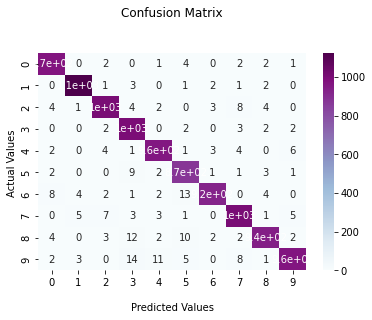

In [9]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test, pred)
print(cf_matrix)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='BuPu')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [10]:
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(test, pred), '.2f'),'\n\n')
target=[str(i) for i in range(10)]
print('Classification Report'.center(65,'-'),'\n', metrics.classification_report(test, pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.98 


----------------------Classification Report---------------------- 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.99      0.96      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

